# Image Generator

This notebook is meant to take in an image file, convert to grayscale, convert from rectangular to square, resize down to 48 x 48 pixels, generate more images with random rotation angles and reflection fill to improve model accuracy.

#### *Take in image and Convert to Grayscale*

In [4]:
import cv2

# Import image
image_name = 'how-to-be-happy'
directory = f"./Inputs/{image_name}.jpg"
image = cv2.imread(directory)

# Create the grayscale image and save file
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite(f'./Inputs/1_grayscale/{image_name}.png', gray_img)

True

#### *Convert from rectangle to square*

In [6]:
image_name

'how-to-be-happy'

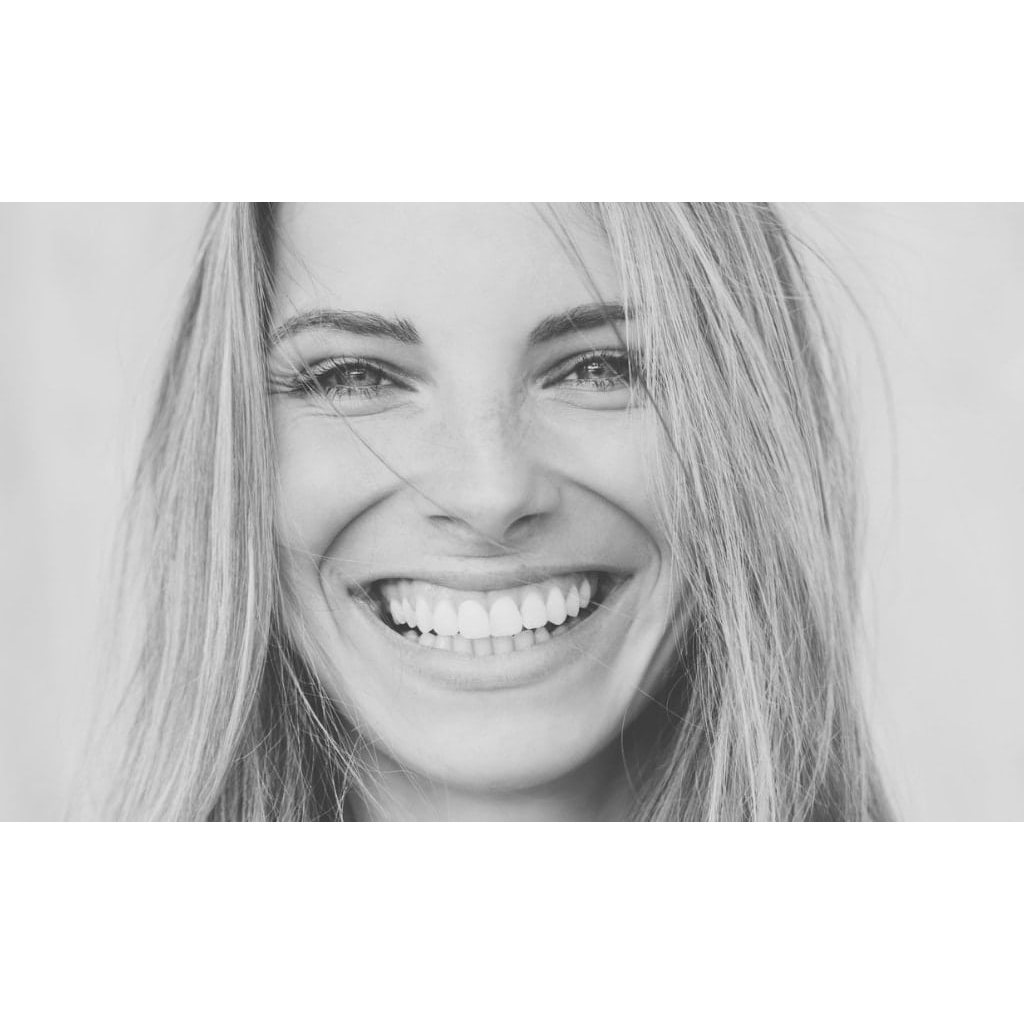

In [12]:
from PIL import Image

def make_square(im, min_size=48, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

test_image = Image.open(f'./Inputs/1_grayscale/{image_name}.png')
new_image = make_square(test_image)
# new_image.show()
new_image

In [10]:
new_image.save(f'./Inputs/2_square/{image_name}.png') # Save image

#### *Resize down to 48x48*

In [14]:
from PIL import Image
import os

indir = './Inputs/2_square'
outdir = './Inputs/3_48x48'
size_48 = (48,48)

for f in os.listdir(indir):
    if f.endswith('.png'):
#         print(f)
        i = Image.open(f"{indir}/{f}")
        fn, fext = os.path.splitext(f)
#         print(f"{fn} and {fext}")
        i.thumbnail(size_48)
#         i.save(f"{mydir}/pngs/{fn}.png")
        i.save(f"{outdir}/{fn}{fext}")

#### *Convert Image to CSV format*

In [17]:
from PIL import Image
import numpy as np
import sys
import os
import csv

def createFileList(myDir, format='.png'):
    fileList = []
    print(f"myDir is: {myDir}")
    for root, dirs, files in os.walk(myDir, topdown=False):
        print(f"root is: {root}")
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    print(f"filelist is: {fileList}")
    return fileList

# myFileList = createFileList('/home/paras/PycharmProjects/HelloWorld/cropped_face')
myFileList = createFileList(outdir)

for file in myFileList:
    print(file)
    img_file = Image.open(file)
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode
    img_grey = img_file.convert('L')
    
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1],img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("image_to_csv.csv", 'w') as f:
        writer = csv.writer(f)
        writer.writerow(value)

myDir is: ./Inputs/3_48x48
root is: ./Inputs/3_48x48
filelist is: ['./Inputs/3_48x48\\how-to-be-happy.png']
./Inputs/3_48x48\how-to-be-happy.png
[0 0 0 ... 0 0 0]
